In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/harik/Data science Assignment/diabetes.csv") 
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

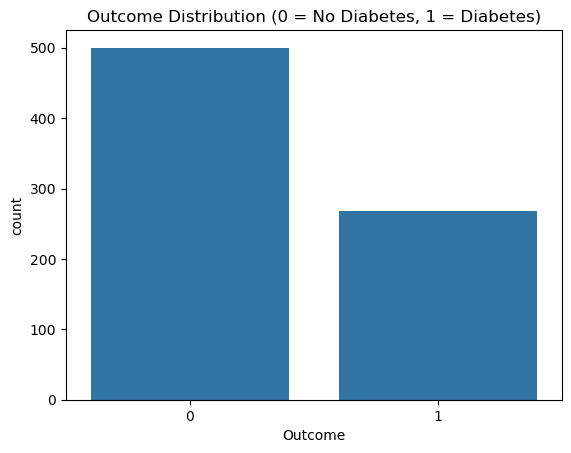

In [4]:
sns.countplot(x="Outcome", data=df)
plt.title("Outcome Distribution (0 = No Diabetes, 1 = Diabetes)")
plt.show()

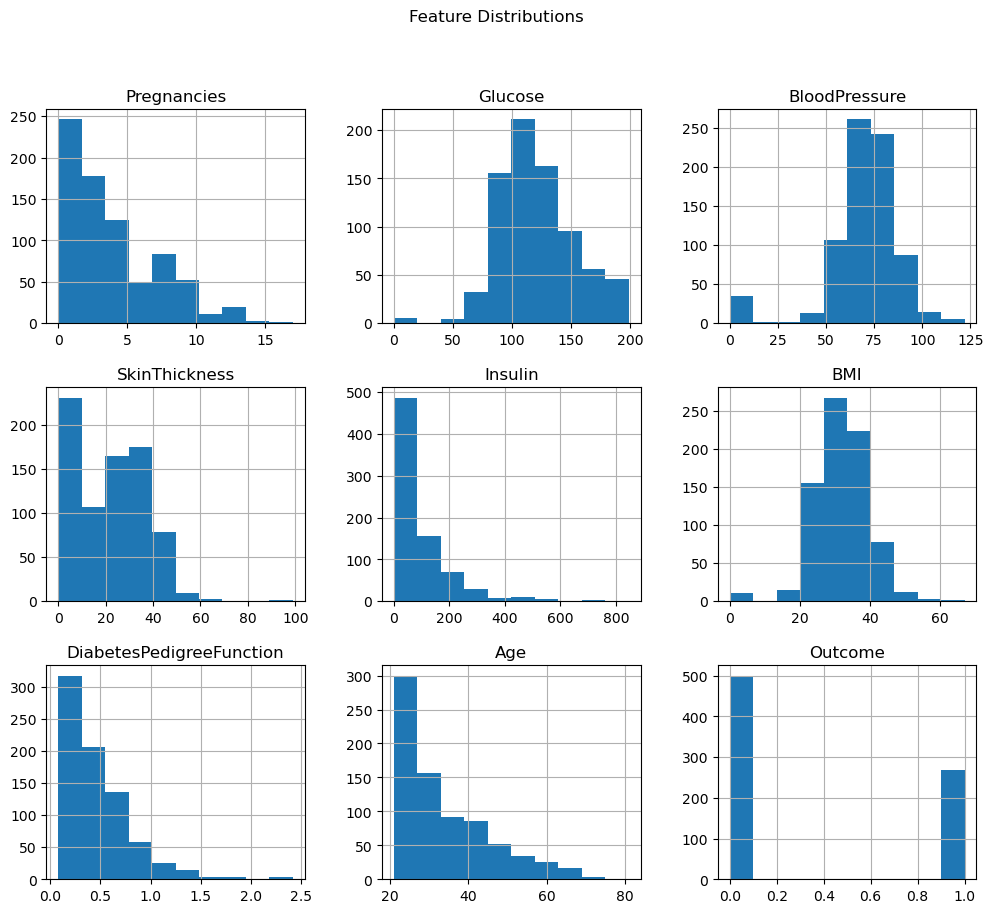

In [5]:
df.hist(figsize=(12,10))
plt.suptitle("Feature Distributions")
plt.show()

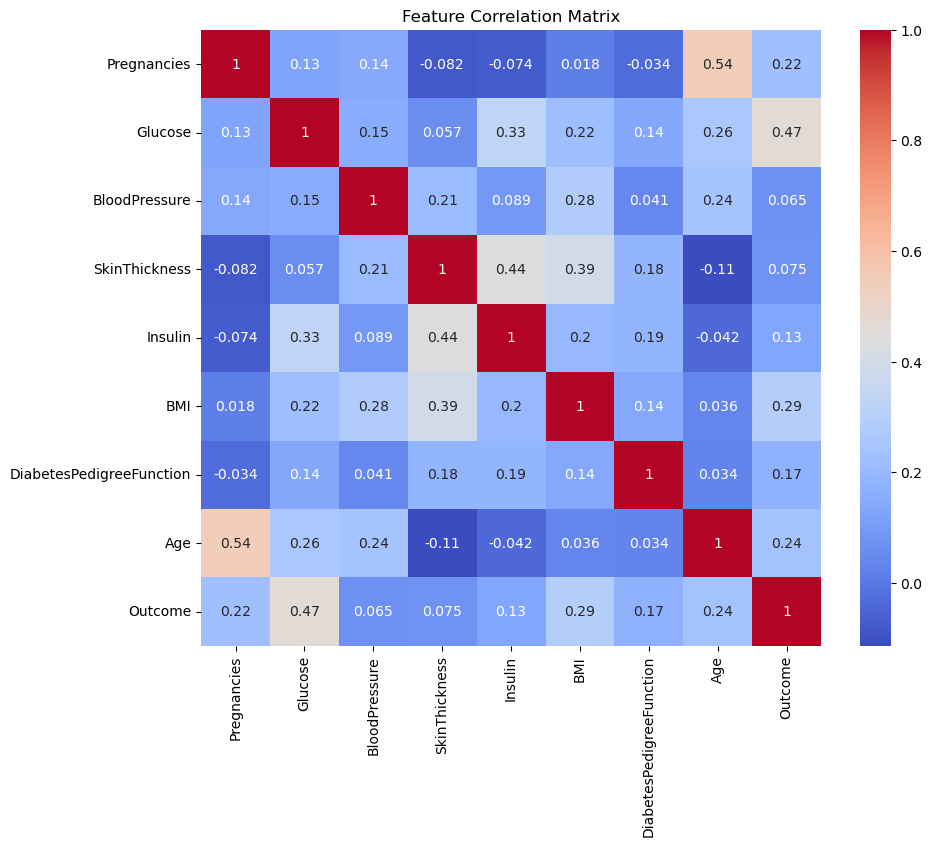

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

In [7]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [11]:
preprocessor = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

In [12]:
from lightgbm import LGBMClassifier

In [13]:
lgbm_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LGBMClassifier(random_state=42))
])

In [14]:
lgbm_pipeline.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000279 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 670
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                 ('scaler', StandardScaler())])),
                ('model', LGBMClassifier(random_state=42))])

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [16]:
y_pred_lgbm = lgbm_pipeline.predict(X_test)

print("LightGBM Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_lgbm))
print("Precision:", precision_score(y_test, y_pred_lgbm))
print("Recall:", recall_score(y_test, y_pred_lgbm))
print("F1 Score:", f1_score(y_test, y_pred_lgbm))

LightGBM Performance
Accuracy: 0.7402597402597403
Precision: 0.6521739130434783
Recall: 0.5555555555555556
F1 Score: 0.6


In [17]:
from xgboost import XGBClassifier

In [18]:
xgb_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", XGBClassifier(
        use_label_encoder=False,
        eval_metric="logloss",
        random_state=42
    ))
])

In [19]:
xgb_pipeline.fit(X_train, y_train)

C:\Users\harik\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [17:07:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                 ('scaler', StandardScaler())])),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='logloss',
                               featur...ne,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [20]:
y_pred_xgb = xgb_pipeline.predict(X_test)

print("XGBoost Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))

XGBoost Performance
Accuracy: 0.7337662337662337
Precision: 0.6226415094339622
Recall: 0.6111111111111112
F1 Score: 0.616822429906542


In [21]:
param_grid_lgbm = {
    "model__n_estimators": [100, 200],
    "model__max_depth": [3, 5, 7],
    "model__learning_rate": [0.05, 0.1]
}

cv = StratifiedKFold(n_splits=5)

grid_lgbm = GridSearchCV(
    lgbm_pipeline,
    param_grid_lgbm,
    cv=cv,
    scoring="f1",
    n_jobs=-1
)

grid_lgbm.fit(X_train, y_train)

print("Best LightGBM Parameters:", grid_lgbm.best_params_)

[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000582 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 670
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [22]:
results = pd.DataFrame({
    "Model": ["LightGBM", "XGBoost"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lgbm),
        accuracy_score(y_test, y_pred_xgb)
    ],
    "Precision": [
        precision_score(y_test, y_pred_lgbm),
        precision_score(y_test, y_pred_xgb)
    ],
    "Recall": [
        recall_score(y_test, y_pred_lgbm),
        recall_score(y_test, y_pred_xgb)
    ],
    "F1 Score": [
        f1_score(y_test, y_pred_lgbm),
        f1_score(y_test, y_pred_xgb)
    ]
})

results

,Model,Accuracy,Precision,Recall,F1 Score
0,LightGBM,0.740260,0.652174,0.555556,0.600000
1,XGBoost,0.733766,0.622642,0.611111,0.616822


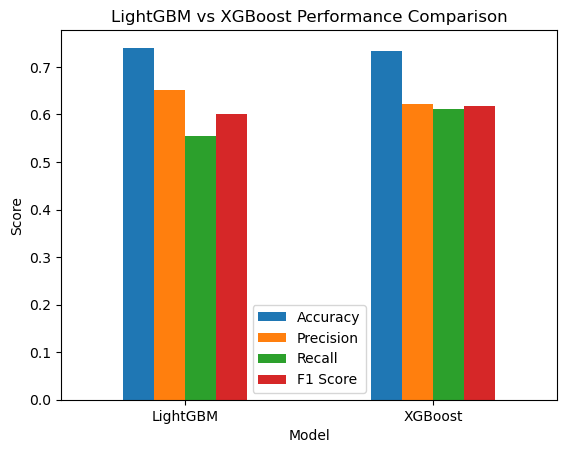

In [23]:
results.set_index("Model").plot(kind="bar")
plt.title("LightGBM vs XGBoost Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()